In [6]:

import itertools
#import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report,accuracy_score
#from sklearn import preprocessing,cross_validation,neighbors
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from time import time
%matplotlib inline

In [64]:
# Importing the dataset
df = pd.read_csv('breastcancer-wisconsin.data.txt')
df.replace('?', '#', inplace=True)
df.head()

,Samplecodenumber,ClumpThickness,UniformityCelSize,UniformityCelShape,MarginalAdhesion,SingleEpithelialCelSize,Bare Nuclei,BlandChromatin,NormalNucleol,Mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [65]:
# to generat heat map with out samplecode number
df.drop(['Samplecodenumber'],1,inplace=True)
X = df.iloc[:, 0:9].values
Y = df.iloc[:, 9].values


In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
# Importing the dataset
print((df[["ClumpThickness","UniformityCelShape","Bare Nuclei"]] == '#').sum())
# checking missing values in suspected columns


ClumpThickness         0
UniformityCelShape     0
Bare Nuclei           16
dtype: int64


C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [67]:
df = df.apply(pd.to_numeric, errors="coerce")
df = df.dropna()
df


,ClumpThickness,UniformityCelSize,UniformityCelShape,MarginalAdhesion,SingleEpithelialCelSize,Bare Nuclei,BlandChromatin,NormalNucleol,Mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
5,8,10,10,8,7,10.0,9,7,1,4
6,1,1,1,1,2,10.0,3,1,1,2
7,2,1,2,1,2,1.0,3,1,1,2
8,2,1,1,1,2,1.0,1,1,5,2
9,4,2,1,1,2,1.0,2,1,1,2


In [68]:
df.loc[:,"Bare Nuclei"]

0       1.0
1      10.0
2       2.0
3       4.0
4       1.0
5      10.0
6      10.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      3.0
13      3.0
14      9.0
15      1.0
16      1.0
17      1.0
18     10.0
19      1.0
20     10.0
21      7.0
22      1.0
24      1.0
25      7.0
26      1.0
27      1.0
28      1.0
29      1.0
30      1.0
       ... 
669     5.0
670     8.0
671     1.0
672     1.0
673     1.0
674     1.0
675     1.0
676     1.0
677     1.0
678     1.0
679     1.0
680    10.0
681    10.0
682     1.0
683     1.0
684     1.0
685     1.0
686     1.0
687     1.0
688     1.0
689     1.0
690     1.0
691     5.0
692     1.0
693     1.0
694     2.0
695     1.0
696     3.0
697     4.0
698     5.0
Name: Bare Nuclei, Length: 683, dtype: float64

In [69]:
df.head()

,ClumpThickness,UniformityCelSize,UniformityCelShape,MarginalAdhesion,SingleEpithelialCelSize,Bare Nuclei,BlandChromatin,NormalNucleol,Mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


# NUMERICAL DATA AUGMENTATION 

In [70]:
CT = df['ClumpThickness']
UOCS = df['UniformityCelSize']
UCS = df['UniformityCelShape']
MA = df['MarginalAdhesion']
SECS = df['SingleEpithelialCelSize']
BN = df['Bare Nuclei']
BC = df['BlandChromatin']
NN = df['NormalNucleol']
M = df['Mitoses']
CLASS = df['class']

In [71]:
CTs = np.std(CT)
UOCSs = np.std(UOCS)
UCSs = np.std(UCS)
MAs = np.std(MA)
SECSs = np.std(SECS)
BNs = np.std(BN)
BCs = np.std(BC)
NNs = np.std(NN)
Ms = np.std(M)
CLASSs = np.std(CLASS)
print(Ms)

1.7314052526140615


In [72]:
datasetnew = []

for _, row in df.iterrows():
    
#for index, row in df.iterrows():
     temp = { 'CT': row['ClumpThickness'],
             'UOCS': row['UniformityCelSize'],
             'UCS': row['UniformityCelShape'],
             'MA': row['MarginalAdhesion'],
             'SECS': row['SingleEpithelialCelSize'],
             'BN': row['Bare Nuclei'],
             'BC': row['BlandChromatin'],
             'NN': row['NormalNucleol'],
             'M': row['Mitoses'],
             'CLASS': row['class']
            }
datasetnew.append(temp)
print(temp)


{'CT': 4.0, 'UOCS': 8.0, 'UCS': 8.0, 'MA': 5.0, 'SECS': 4.0, 'BN': 5.0, 'BC': 10.0, 'NN': 4.0, 'M': 1.0, 'CLASS': 4.0}


In [73]:
#
for _ in range(10):
     for _,row in df.iterrows():
        temp = {
            'CT': row['ClumpThickness'] + np.random.uniform(CTs),
            'UOCS' : row['UniformityCelSize'] + np.random.uniform(UOCSs),
            'UCS' : row['UniformityCelShape'] + np.random.uniform(UCSs),
            'MA' : row['MarginalAdhesion'] + np.random.uniform(MAs),
            'SECS' : row['SingleEpithelialCelSize'] + np.random.uniform(SECSs),
            'BN' : row['Bare Nuclei'] + np.random.uniform(BNs),
            'BC' : row['BlandChromatin'] + np.random.uniform(BCs),
            'NN' : row['NormalNucleol'] + np.random.uniform(NNs),
            'M' : row['Mitoses'] + np.random.uniform(Ms),
            'CLASS' : row['class'] + np.random.uniform(CLASSs)
        }
        datasetnew.append(temp)
        print(temp)
    
print(len(datasetnew)), "new entries"

{'CT': 6.900936963888522, 'UOCS': 3.8967655797751504, 'UCS': 2.21306700652986, 'MA': 2.952228313196378, 'SECS': 3.4824015151858516, 'BN': 3.409208943860026, 'BC': 4.0193658861804895, 'NN': 2.099720128717432, 'M': 2.325717562936527, 'CLASS': 2.958825396602447}
{'CT': 7.568683004201821, 'UOCS': 5.918093770787314, 'UCS': 6.976483569180115, 'MA': 6.99488857471912, 'SECS': 9.187032936965423, 'BN': 13.588415199199485, 'BC': 4.715369612414079, 'NN': 3.9867450225338565, 'M': 2.3893526114919386, 'CLASS': 2.9554757332152732}
{'CT': 5.816575226579812, 'UOCS': 2.6376711359892786, 'UCS': 2.1418671387965853, 'MA': 3.3405231551733463, 'SECS': 3.8652318028073855, 'BN': 3.8970714205848456, 'BC': 5.12143429531383, 'NN': 2.8929007577231585, 'M': 2.1982227440034983, 'CLASS': 2.965316056613097}
{'CT': 8.304149717068105, 'UOCS': 10.738687794170527, 'UCS': 9.569161936788564, 'MA': 3.3902636971221485, 'SECS': 4.315751553634177, 'BN': 6.898732702993816, 'BC': 4.955559614151779, 'NN': 8.699420765953123, 'M': 2.

(None, 'new entries')

In [74]:
df = pd.DataFrame(datasetnew)
df.to_csv('newWBCDataset.csv')

# ML Algorithms on AUGMENTED DATASET

In [19]:
dataset = pd.read_csv('newWBCDataset.csv')
#dataset

dataset.head()


,Unnamed: 0,BC,BN,CLASS,CT,M,MA,NN,SECS,UCS,UOCS
0,0,10.000000,5.000000,4.000000,4.000000,1.000000,5.000000,4.000000,4.000000,8.000000,8.000000
1,1,4.019366,3.409209,2.958825,6.900937,2.325718,2.952228,2.099720,3.482402,2.213067,3.896766
2,2,4.715370,13.588415,2.955476,7.568683,2.389353,6.994889,3.986745,9.187033,6.976484,5.918094
3,3,5.121434,3.897071,2.965316,5.816575,2.198223,3.340523,2.892901,3.865232,2.141867,2.637671
4,4,4.955560,6.898733,2.982284,8.304150,2.317192,3.390264,8.699421,4.315752,9.569162,10.738688


In [20]:
dataset.loc[:,"CLASS"]

0       4.000000
1       2.958825
2       2.955476
3       2.965316
4       2.982284
5       2.970552
6       4.996294
7       2.968012
8       2.968328
9       2.998068
10      2.981532
11      2.983476
12      2.961451
13      4.972330
14      2.997848
15      4.975011
16      4.980237
17      2.967432
18      2.962701
19      4.993115
20      2.991395
21      4.977076
22      4.991314
23      2.980476
24      2.974126
25      4.997444
26      2.973747
27      2.987345
28      2.993306
29      2.969065
          ...   
6801    4.983397
6802    4.979860
6803    2.983437
6804    2.981886
6805    2.989432
6806    2.998095
6807    2.957260
6808    2.989022
6809    2.966642
6810    2.962572
6811    2.961193
6812    4.957597
6813    4.962101
6814    2.987620
6815    2.953971
6816    2.959648
6817    2.998808
6818    2.973506
6819    2.965205
6820    2.986681
6821    2.970110
6822    2.990057
6823    4.976915
6824    2.999875
6825    2.967219
6826    2.984940
6827    2.990949
6828    4.9985

In [21]:
dataset['CLASS'].apply(np.floor)

0       4.0
1       2.0
2       2.0
3       2.0
4       2.0
5       2.0
6       4.0
7       2.0
8       2.0
9       2.0
10      2.0
11      2.0
12      2.0
13      4.0
14      2.0
15      4.0
16      4.0
17      2.0
18      2.0
19      4.0
20      2.0
21      4.0
22      4.0
23      2.0
24      2.0
25      4.0
26      2.0
27      2.0
28      2.0
29      2.0
       ... 
6801    4.0
6802    4.0
6803    2.0
6804    2.0
6805    2.0
6806    2.0
6807    2.0
6808    2.0
6809    2.0
6810    2.0
6811    2.0
6812    4.0
6813    4.0
6814    2.0
6815    2.0
6816    2.0
6817    2.0
6818    2.0
6819    2.0
6820    2.0
6821    2.0
6822    2.0
6823    4.0
6824    2.0
6825    2.0
6826    2.0
6827    2.0
6828    4.0
6829    4.0
6830    4.0
Name: CLASS, Length: 6831, dtype: float64

# floor and ceiling function to round off the CLASS values

In [22]:
dataset['CLASS'] = dataset['CLASS'].apply((np.floor), 'CLASS')

In [23]:
dataset.head()

,Unnamed: 0,BC,BN,CLASS,CT,M,MA,NN,SECS,UCS,UOCS
0,0,10.000000,5.000000,4.0,4.000000,1.000000,5.000000,4.000000,4.000000,8.000000,8.000000
1,1,4.019366,3.409209,2.0,6.900937,2.325718,2.952228,2.099720,3.482402,2.213067,3.896766
2,2,4.715370,13.588415,2.0,7.568683,2.389353,6.994889,3.986745,9.187033,6.976484,5.918094
3,3,5.121434,3.897071,2.0,5.816575,2.198223,3.340523,2.892901,3.865232,2.141867,2.637671
4,4,4.955560,6.898733,2.0,8.304150,2.317192,3.390264,8.699421,4.315752,9.569162,10.738688


In [24]:
dataset.loc[:,"CLASS"]

0       4.0
1       2.0
2       2.0
3       2.0
4       2.0
5       2.0
6       4.0
7       2.0
8       2.0
9       2.0
10      2.0
11      2.0
12      2.0
13      4.0
14      2.0
15      4.0
16      4.0
17      2.0
18      2.0
19      4.0
20      2.0
21      4.0
22      4.0
23      2.0
24      2.0
25      4.0
26      2.0
27      2.0
28      2.0
29      2.0
       ... 
6801    4.0
6802    4.0
6803    2.0
6804    2.0
6805    2.0
6806    2.0
6807    2.0
6808    2.0
6809    2.0
6810    2.0
6811    2.0
6812    4.0
6813    4.0
6814    2.0
6815    2.0
6816    2.0
6817    2.0
6818    2.0
6819    2.0
6820    2.0
6821    2.0
6822    2.0
6823    4.0
6824    2.0
6825    2.0
6826    2.0
6827    2.0
6828    4.0
6829    4.0
6830    4.0
Name: CLASS, Length: 6831, dtype: float64

In [25]:
dataset=dataset.replace({'CLASS':{2:0, 4:1}})

In [26]:
dataset

,Unnamed: 0,BC,BN,CLASS,CT,M,MA,NN,SECS,UCS,UOCS
0,0,10.000000,5.000000,1.0,4.000000,1.000000,5.000000,4.000000,4.000000,8.000000,8.000000
1,1,4.019366,3.409209,0.0,6.900937,2.325718,2.952228,2.099720,3.482402,2.213067,3.896766
2,2,4.715370,13.588415,0.0,7.568683,2.389353,6.994889,3.986745,9.187033,6.976484,5.918094
3,3,5.121434,3.897071,0.0,5.816575,2.198223,3.340523,2.892901,3.865232,2.141867,2.637671
4,4,4.955560,6.898733,0.0,8.304150,2.317192,3.390264,8.699421,4.315752,9.569162,10.738688
5,5,4.537933,3.402010,0.0,5.529227,2.106246,5.025599,2.061482,3.081208,2.886243,2.431786
6,6,11.043523,12.080342,1.0,9.353213,2.291870,9.708558,8.889512,8.986363,12.234520,11.260566
7,7,4.346082,13.326359,0.0,2.452239,2.693925,2.890638,3.242090,4.012653,3.640629,3.021728
8,8,4.855580,2.088895,0.0,3.697770,2.446381,2.184352,3.746158,3.401355,3.926733,2.255850
9,9,2.111504,2.941826,0.0,4.114408,6.681385,3.278533,2.951373,3.233711,2.707990,3.025537


In [27]:
dataset.drop(['Unnamed: 0'],1,inplace=True)

In [28]:
dataset.head()

,BC,BN,CLASS,CT,M,MA,NN,SECS,UCS,UOCS
0,10.000000,5.000000,1.0,4.000000,1.000000,5.000000,4.000000,4.000000,8.000000,8.000000
1,4.019366,3.409209,0.0,6.900937,2.325718,2.952228,2.099720,3.482402,2.213067,3.896766
2,4.715370,13.588415,0.0,7.568683,2.389353,6.994889,3.986745,9.187033,6.976484,5.918094
3,5.121434,3.897071,0.0,5.816575,2.198223,3.340523,2.892901,3.865232,2.141867,2.637671
4,4.955560,6.898733,0.0,8.304150,2.317192,3.390264,8.699421,4.315752,9.569162,10.738688


In [78]:
print(X)

[[10.          5.          1.         ...  5.          4.
   4.        ]
 [ 4.01936589  3.40920894  2.9588254  ...  2.95222831  2.09972013
   3.48240152]
 [ 4.71536961 13.5884152   2.95547573 ...  6.99488857  3.98674502
   9.18703294]
 ...
 [10.24933123  4.27217698  4.9985448  ...  4.01363716 12.11201239
   9.16511062]
 [12.34017456  6.08887109  4.97165859 ...  6.55869005  8.45537705
   4.96334825]
 [11.09993759  7.96353765  4.9547937  ...  6.95620131  6.1446738
   5.73700519]]


In [79]:
print(Y)

[   0    1    2 ... 6828 6829 6830]


In [30]:

column_names = ["CLASS", "BC", "BN", "CT", "M", "MA", "NN", "SECS", "UCS", "UOCS"]

dataset = dataset.reindex(columns=column_names)

In [31]:
dataset.head()

,CLASS,BC,BN,CT,M,MA,NN,SECS,UCS,UOCS
0,1.0,10.000000,5.000000,4.000000,1.000000,5.000000,4.000000,4.000000,8.000000,8.000000
1,0.0,4.019366,3.409209,6.900937,2.325718,2.952228,2.099720,3.482402,2.213067,3.896766
2,0.0,4.715370,13.588415,7.568683,2.389353,6.994889,3.986745,9.187033,6.976484,5.918094
3,0.0,5.121434,3.897071,5.816575,2.198223,3.340523,2.892901,3.865232,2.141867,2.637671
4,0.0,4.955560,6.898733,8.304150,2.317192,3.390264,8.699421,4.315752,9.569162,10.738688


In [34]:
#dataset.drop(['samplenumber'],1,inplace=True)
Y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:9].values


In [36]:
print(X)
print(Y)

[[10.          5.          4.         ...  4.          4.
   8.        ]
 [ 4.01936589  3.40920894  6.90093696 ...  2.09972013  3.48240152
   2.21306701]
 [ 4.71536961 13.5884152   7.568683   ...  3.98674502  9.18703294
   6.97648357]
 ...
 [10.24933123  4.27217698  6.35544537 ... 12.11201239  9.16511062
  12.4316442 ]
 [12.34017456  6.08887109  5.67123625 ...  8.45537705  4.96334825
   7.47511881]
 [11.09993759  7.96353765  6.49500897 ...  6.1446738   5.73700519
  10.45013099]]
[1. 0. 0. ... 1. 1. 1.]


In [37]:
dataset.head()

,CLASS,BC,BN,CT,M,MA,NN,SECS,UCS,UOCS
0,1.0,10.000000,5.000000,4.000000,1.000000,5.000000,4.000000,4.000000,8.000000,8.000000
1,0.0,4.019366,3.409209,6.900937,2.325718,2.952228,2.099720,3.482402,2.213067,3.896766
2,0.0,4.715370,13.588415,7.568683,2.389353,6.994889,3.986745,9.187033,6.976484,5.918094
3,0.0,5.121434,3.897071,5.816575,2.198223,3.340523,2.892901,3.865232,2.141867,2.637671
4,0.0,4.955560,6.898733,8.304150,2.317192,3.390264,8.699421,4.315752,9.569162,10.738688


# feature importance

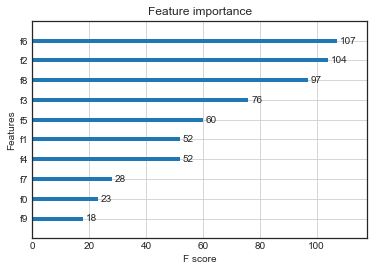

<Figure size 720x720 with 0 Axes>

In [141]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
# load data


# fit model no training data
model = XGBClassifier()
model.fit(X,Y)
# plot feature importance

plot_importance(model)
pyplot.figure(figsize=(10,10))
pyplot.show()


C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature: 0, Score: 0.07696
Feature: 1, Score: 0.11050
Feature: 2, Score: 0.13719
Feature: 3, Score: 0.20199
Feature: 4, Score: 0.08076
Feature: 5, Score: 0.09360
Feature: 6, Score: 0.10285
Feature: 7, Score: 0.05938
Feature: 8, Score: 0.08285
Feature: 9, Score: 0.05392


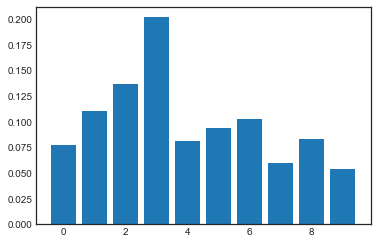

In [139]:

# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, Y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc =  StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Text(0.5, 1.0, 'PCA=2: PC1 vs PC2 for WBC augmented Dataset ')

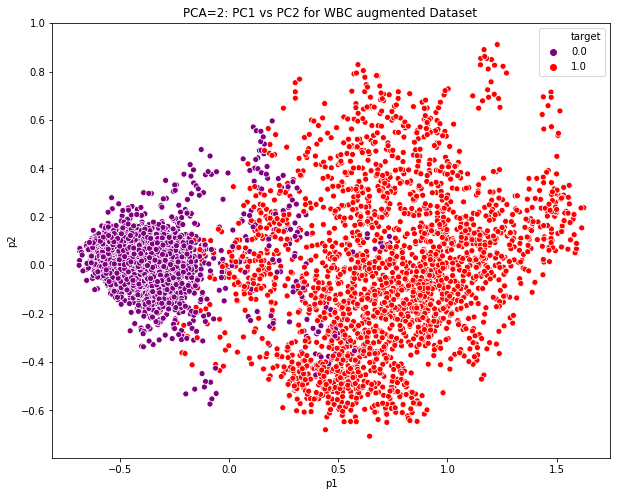

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
#from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns=["p1", "p2"])
pca_data["target"] = Y
plt.figure(figsize=(10,8))

sns.scatterplot(x="p1", y="p2" , hue="target", data=pca_data,palette=['purple','red'], legend='full')

plt.title("PCA=2: PC1 vs PC2 for WBC augmented Dataset ")

Text(0.5, 1.0, 'TSNE for WBC augmented Dataset ')

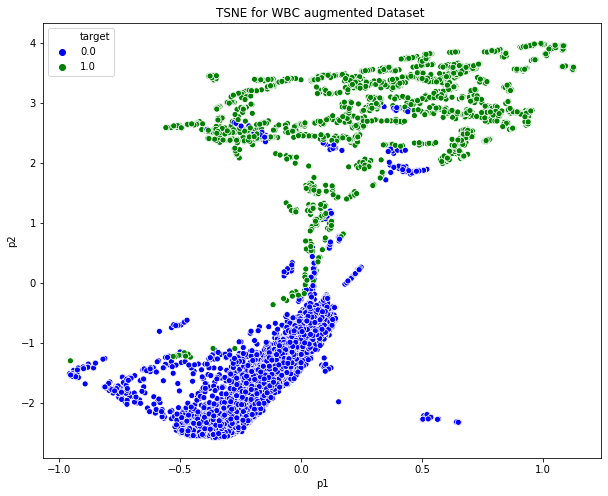

In [107]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=250, random_state=42)
X_tsne = tsne.fit_transform(x_scaled)
X_reduced_pca = tsne.fit_transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns=["p1", "p2"])
pca_data["target"] = Y
plt.figure(figsize=(10,8))

sns.scatterplot(x="p1", y="p2" , hue="target", data=pca_data,palette=['blue','green'], legend='full')

plt.title("TSNE for WBC augmented Dataset ")

In [89]:
colors = {0:'#FCEE0C',1:'#FC8E72'}

explained variance ratio (first two components): [0.65317426 0.0837416 ]


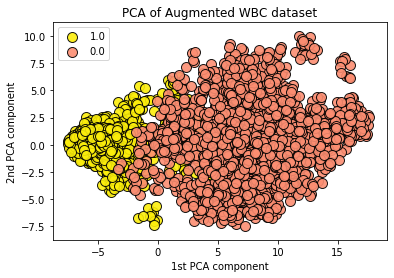

In [94]:
pca2 = PCA(n_components=2)
X_r = pca2.fit_transform(X)

for color, i, target_name in zip(colors.values(), [0, 1], Y):
    plt.scatter(X_r[Y == i, 0], X_r[Y == i, 1], color=color, alpha=.9, 
                label=target_name, s=100, edgecolors='k')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('1st PCA component')
plt.ylabel('2nd PCA component')
plt.title('PCA of Augmented WBC dataset')

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s' # First two PCA components capture 0.9776852*100% of total variation!
      % str(pca2.explained_variance_ratio_))

plt.show()

explained variance ratio (first three components): [0.67221538 0.07565065 0.06202512]


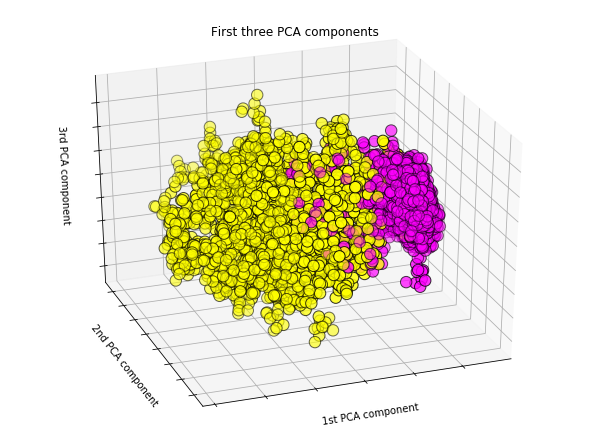

In [97]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
pca3 = PCA(n_components=3)

X_reduced = pca3.fit_transform(dataset)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.spring, edgecolor='k', s=130)
ax.set_title("First three PCA components")
ax.set_xlabel("1st PCA component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd PCA component")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd PCA component")
ax.w_zaxis.set_ticklabels([])

# Percentage of variance explained for each component
print('explained variance ratio (first three components): {}' # First three PCA components capture 0.99478781 of total variation!
      .format(pca3.explained_variance_ratio_))

plt.show()


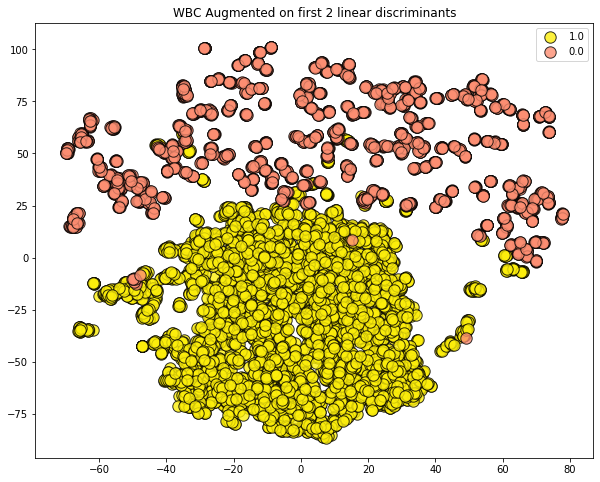

In [100]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

figure = plt.figure
figure(figsize=(10, 8))

for color, i, target_name in zip(colors.values(), [0, 1], Y):
    plt.scatter(X_tsne[Y == i, 0], X_tsne[Y == i, 1], alpha=.8, color=color,
                label=target_name,  s=130, edgecolors='k')
plt.legend(loc='best', shadow=False, scatterpoints=1)
           
plt.title('WBC Augmented on first 2 linear discriminants')
plt.show()

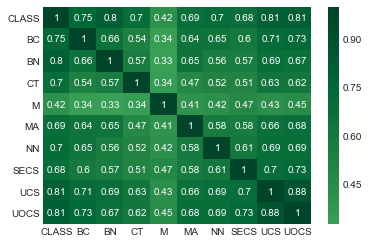

In [132]:
sns.heatmap(dataset.corr(), center = 0, annot =True, cmap='');

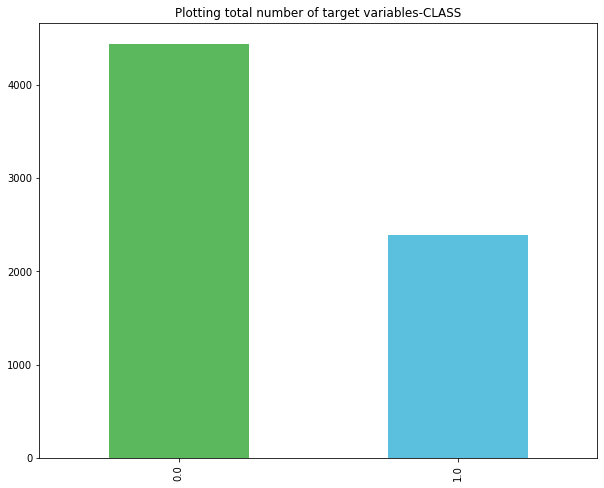

In [119]:
#plotting categorical variable
plt.figure(figsize=(10,8))
dataset['CLASS'].value_counts().plot(kind='bar',color=['#5cb85c','#5bc0de'])
plt.title(f"Plotting total number of target variables-CLASS")
plt.show()

In [113]:
dataset['CLASS'].value_counts()

0.0    4440
1.0    2391
Name: CLASS, dtype: int64

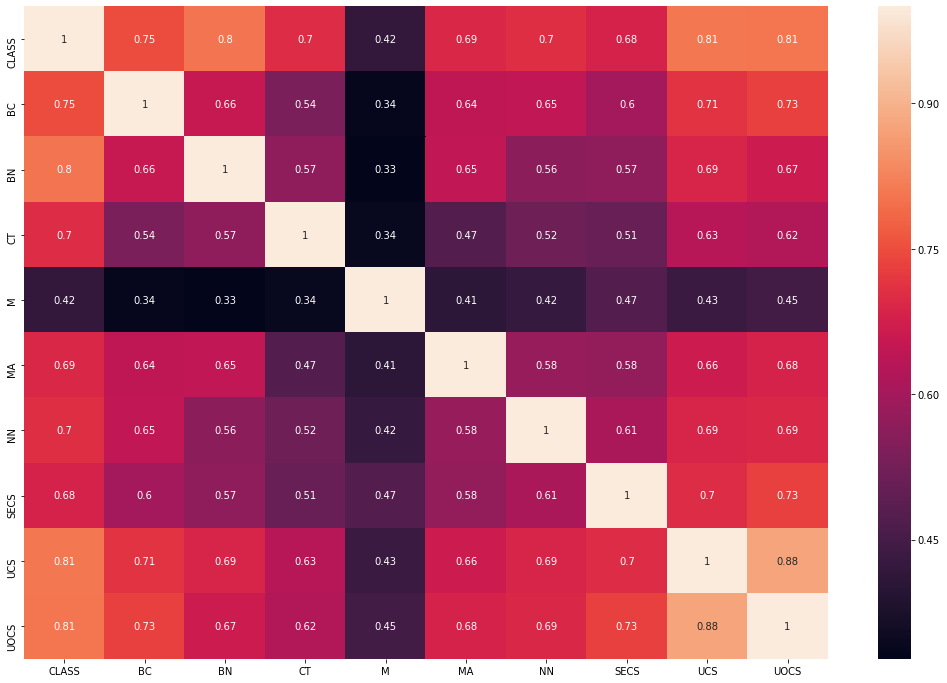

In [115]:
dataset_corr=dataset.corr()
plt.figure(figsize=(18,12))
sns.heatmap(dataset_corr, annot=True)

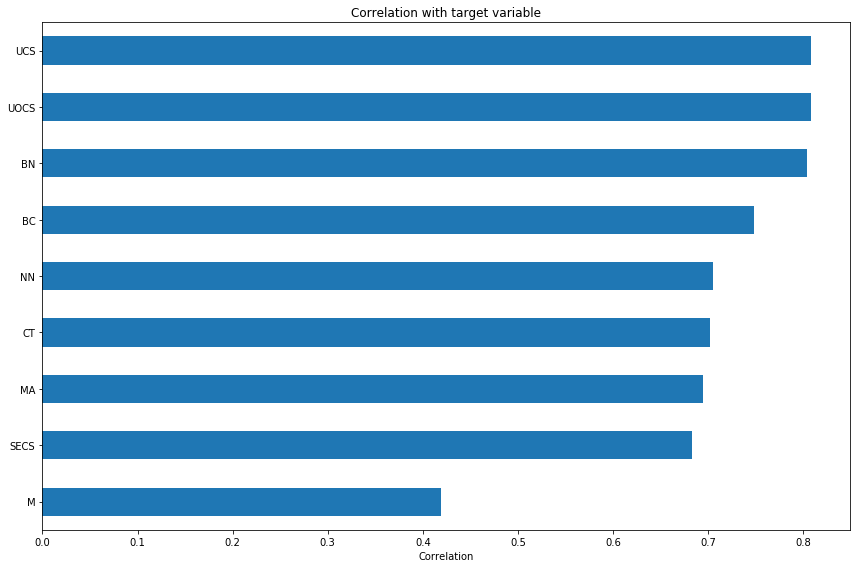

In [116]:
#correlation with target variable
plt.figure(figsize=(12,8))
dataset_corr['CLASS'].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation with target variable")
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()

# knn without feature selection after augmentation

In [80]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors =3, metric = 'euclidean')
#t0=time()
clf_knn.fit(X_train, Y_train)
#print "training time:", round(time()-t0, 3), "s"
#t1=time()
Y_predct=clf_knn.predict(X_test)
#print "predict time:", round(time()-t1, 3), "s"
acc=clf_knn.score(X_test,Y_test)
print(acc,'KNeighborsClassifier')
print(classification_report(Y_test,Y_predct))

0.9994145199063232 KNeighborsClassifier
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1087
         1.0       1.00      1.00      1.00       621

   micro avg       1.00      1.00      1.00      1708
   macro avg       1.00      1.00      1.00      1708
weighted avg       1.00      1.00      1.00      1708



# SVM wofs after augmentation

In [81]:
from sklearn.svm import SVC
clffi = SVC(kernel='rbf',C= 100, gamma= 0.3, random_state=42,probability=True)
clffi.fit(X_train,Y_train)

Y_predictt=clffi.predict(X_test)
Y_predictt

accura=clffi.score(X_test,Y_test)
print(accura,'SVM')
print(classification_report(Y_test,Y_predictt))

0.9994145199063232 SVM
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1087
         1.0       1.00      1.00      1.00       621

   micro avg       1.00      1.00      1.00      1708
   macro avg       1.00      1.00      1.00      1708
weighted avg       1.00      1.00      1.00      1708



# DT wofs after augmentation

In [82]:
# Fitting DT to the Training set
from sklearn import tree
clasifier = tree.DecisionTreeClassifier(random_state=42, max_depth= 7)
clasifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = clasifier.predict(X_test)
Y_pred

accuracy = clasifier.score( X_test,Y_test)
print(accuracy,'DecisionTree')

print(classification_report(Y_test, Y_pred))

0.9771662763466042 DecisionTree
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1087
         1.0       0.97      0.97      0.97       621

   micro avg       0.98      0.98      0.98      1708
   macro avg       0.97      0.98      0.98      1708
weighted avg       0.98      0.98      0.98      1708



# nAIVE bayes after data augmentation wofs

In [83]:
from sklearn.naive_bayes import GaussianNB
clff = GaussianNB()
clff.fit(X_train, Y_train)

Y_predic=clff.predict(X_test)
Y_predic

accur=clff.score(X_test,Y_test)
print(accur,'NaiveBayes')
print(classification_report(Y_test,Y_predic))

0.961943793911007 NaiveBayes
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      1087
         1.0       0.93      0.97      0.95       621

   micro avg       0.96      0.96      0.96      1708
   macro avg       0.95      0.96      0.96      1708
weighted avg       0.96      0.96      0.96      1708



# LOGISTIC REGRESSION WOFS AFTER DATA AUGMENTATION

In [84]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()
clf.fit(X_train,Y_train)

Y_predi=clf.predict(X_test)
Y_predi

accu=clf.score(X_test,Y_test)
print(accu,'LogisticRegression')
print(classification_report(Y_test,Y_predi))


0.9672131147540983 LogisticRegression
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1087
         1.0       0.95      0.95      0.95       621

   micro avg       0.97      0.97      0.97      1708
   macro avg       0.96      0.96      0.96      1708
weighted avg       0.97      0.97      0.97      1708



C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Learning curves

# confusion mtrices

Confusion matrix, without normalization
[[1086    1]
 [   0  621]]


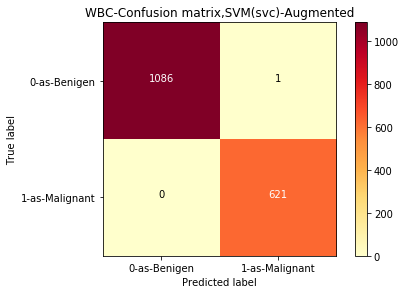

Normalized confusion matrix
[[9.99e-01 9.20e-04]
 [0.00e+00 1.00e+00]]


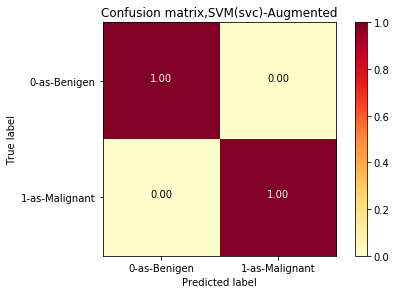

In [126]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.YlOrRd):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
  else:
       print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=0)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cn_matrix = confusion_matrix(Y_test, Y_predictt)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
classs=['0-as-Benigen','1-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=False,
                     title='WBC-Confusion matrix,SVM(svc)-Augmented')
plt.show()
classs=['0-as-Benigen','1-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=True,
                     title='Confusion matrix,SVM(svc)-Augmented')
plt.show()

Confusion matrix, without normalization
[[1038   49]
 [  16  605]]


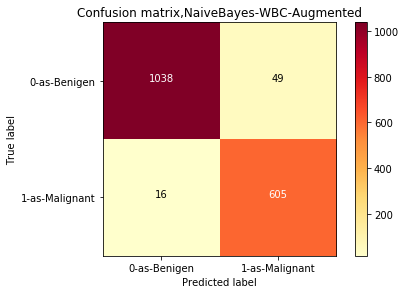

Normalized confusion matrix
[[0.95 0.05]
 [0.03 0.97]]


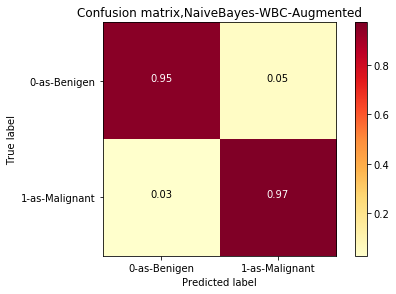

In [127]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.YlOrRd):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
  else:
       print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=0)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cn_matrix = confusion_matrix(Y_test, Y_predic)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
classs=['0-as-Benigen','1-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=False,
                     title='Confusion matrix,NaiveBayes-WBC-Augmented')
plt.show()
classs=['0-as-Benigen','1-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=True,
                     title='Confusion matrix,NaiveBayes-WBC-Augmented')
plt.show()

Confusion matrix, without normalization
[[1059   28]
 [  28  593]]


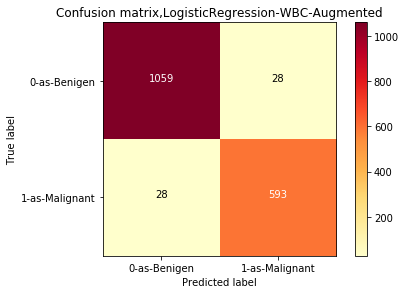

Normalized confusion matrix
[[0.97 0.03]
 [0.05 0.95]]


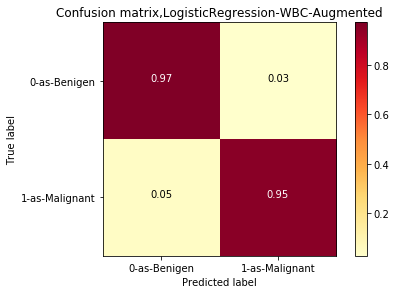

In [128]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cn_matrix = confusion_matrix(Y_test, Y_predi)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
classs=['0-as-Benigen','1-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=False,
                     title='Confusion matrix,LogisticRegression-WBC-Augmented')
plt.show()
classs=['0-as-Benigen','1-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=True,
                     title='Confusion matrix,LogisticRegression-WBC-Augmented')
plt.show()

Confusion matrix, without normalization
[[1066   21]
 [  18  603]]


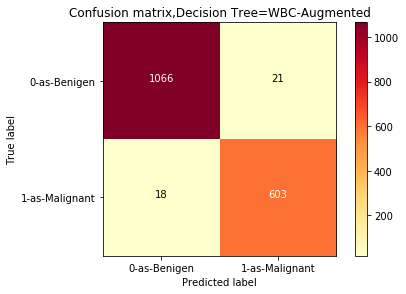

Normalized confusion matrix
[[0.98 0.02]
 [0.03 0.97]]


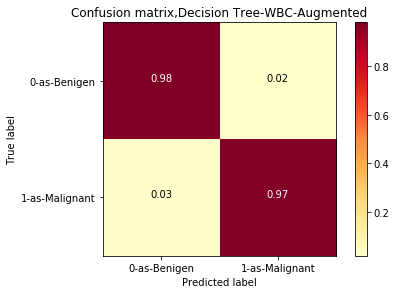

In [129]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cn_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
classs=['0-as-Benigen','1-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=False,
                     title='Confusion matrix,Decision Tree=WBC-Augmented')
plt.show()
classs=['0-as-Benigen','1-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=True,
                     title='Confusion matrix,Decision Tree-WBC-Augmented')
plt.show()

Confusion matrix, without normalization
[[1086    1]
 [   0  621]]


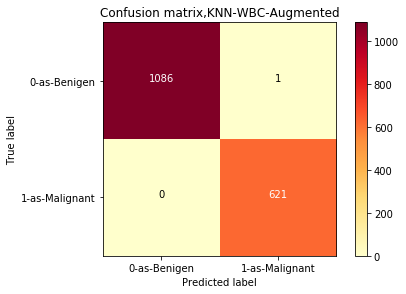

Normalized confusion matrix
[[9.99e-01 9.20e-04]
 [0.00e+00 1.00e+00]]


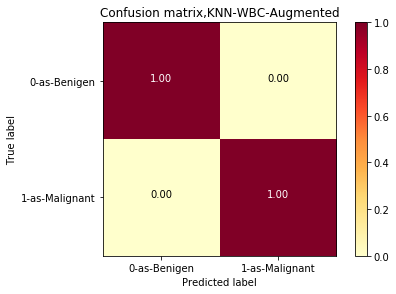

In [130]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cn_matrix = confusion_matrix(Y_test, Y_predct)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
classs=['0-as-Benigen','1-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=False,
                     title='Confusion matrix,KNN-WBC-Augmented')
plt.show()
classs=['0-as-Benigen','1-as-Malignant']
plot_confusion_matrix(cn_matrix, classes=classs,normalize=True,
                     title='Confusion matrix,KNN-WBC-Augmented')
plt.show()

# ROC curves for AUGMENTED WBC

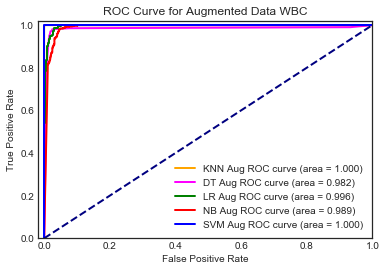

In [131]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.grid(True)
#plt.style.use('ggplot')
%matplotlib inline


Y_predct = clf_knn.predict_proba(X_test)[:,1]
Y_pred = clasifier.predict_proba(X_test)[:,1]
Y_predi = clf.predict_proba(X_test)[:,1]
Y_predic = clff.predict_proba(X_test)[:,1]
Y_predictt = clffi.predict_proba(X_test)[:,1]


# fpr,tpr values for all
clf_knn_fpr, clf_knn_tpr, _ = roc_curve(Y_test, Y_predct)
clasifier_fpr,clasifier_tpr,_ = roc_curve(Y_test,Y_pred)
clf_fpr,clf_tpr,_ = roc_curve(Y_test,Y_predi)
clff_fpr,clff_tpr,_ = roc_curve(Y_test,Y_predic)
clffi_fpr,clffi_tpr,_ = roc_curve(Y_test,Y_predictt)


roc_aucKNN = auc(clf_knn_fpr, clf_knn_tpr)
roc_aucDT= auc(clasifier_fpr,clasifier_tpr)
roc_aucLR= auc(clf_fpr,clf_tpr)
roc_aucNB= auc(clff_fpr,clff_tpr)
roc_aucSVM= auc(clffi_fpr,clffi_tpr)


plt.figure()
plt.plot(clf_knn_fpr, clf_knn_tpr, color='orange',
         lw=2, label='KNN Aug ROC curve (area = %0.3f)' % roc_aucKNN)
plt.plot(clasifier_fpr,clasifier_tpr,color= 'magenta',
         lw=2, label='DT Aug ROC curve (area = %0.3f)' % roc_aucDT)
plt.plot(clf_fpr,clf_tpr,color= 'green',
         lw=2, label='LR Aug ROC curve (area = %0.3f)' % roc_aucLR)
plt.plot(clff_fpr,clff_tpr,color= 'red',
         lw=2, label='NB Aug ROC curve (area = %0.3f)' % roc_aucNB)
plt.plot(clffi_fpr,clffi_tpr,color= 'blue',
         lw=2, label='SVM Aug ROC curve (area = %0.3f)' % roc_aucSVM)


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.style.use('seaborn-white')
plt.grid(False)
#plt.style.use('seaborn-white')
#plt.grid(True)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Augmented Data WBC')
plt.legend(loc="lower right")
plt.show()